<a href="https://colab.research.google.com/github/VISHWAJITT123/CVG-FILES/blob/master/Mnist_TensorFlow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from keras.models import Sequential
from keras.layers import Conv2D,Dense,Flatten
from keras.datasets import mnist
from keras.utils import to_categorical
import matplotlib.pyplot as plt
import numpy as np

In [3]:
# Loading the dataset
(x_train,y_train),(x_test,y_test) = mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


In [4]:
#Get the shape of the data
print(x_train.shape)
print(x_test.shape)

(60000, 28, 28)
(10000, 28, 28)


In [5]:
#Looking at the first data set index = 0 from the training data
x_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [ ]:
# get the image label
y_train[0]

5

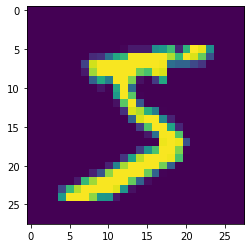

In [6]:
#Get the visual of the data
plt.imshow(x_train[0])

In [7]:
# Reshape the data to fit the model
x_train = x_train.reshape(60000,28,28,1)
x_test = x_test.reshape(10000,28,28,1)

In [8]:
# one-hot Encoding 
y_train_one_hot = to_categorical(y_train)
y_test_one_hot = to_categorical(y_test)

#print the new label
print(y_train_one_hot[0])

[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


Build the CNN model

In [9]:
model = Sequential()
model.add(Conv2D(64,kernel_size=3, activation='relu',input_shape=(28,28,1)))
model.add(Conv2D(32,kernel_size=3,activation='relu'))
model.add(Flatten())
model.add(Dense(10, activation='softmax'))

In [10]:
#Compile the model
model.compile(optimizer='adam',loss = 'categorical_crossentropy',metrics=['accuracy'])

Train the model

In [11]:
hist = model.fit(x_train,y_train_one_hot,validation_data=(x_test,y_test_one_hot),epochs= 3)

Epoch 1/3
1875/1875 [==============================] - 170s 90ms/step - loss: 0.6738 - accuracy: 0.9175 - val_loss: 0.0973 - val_accuracy: 0.9704
Epoch 2/3
1875/1875 [==============================] - 168s 90ms/step - loss: 0.0614 - accuracy: 0.9812 - val_loss: 0.0935 - val_accuracy: 0.9724
Epoch 3/3
1875/1875 [==============================] - 168s 89ms/step - loss: 0.0435 - accuracy: 0.9855 - val_loss: 0.0994 - val_accuracy: 0.9754


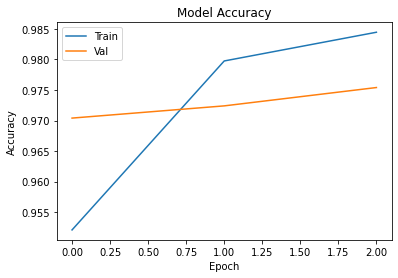

In [12]:
#Visualize The model Accuracy
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train','Val'], loc = 'upper left')
plt.show()

In [13]:
#Show probabilities for the first four images in the test set
predictions = model.predict(x_test[:4])
predictions

array([[2.9034053e-10, 6.9259264e-16, 1.4441275e-09, 1.0245184e-09,
        3.2018653e-17, 2.8640255e-13, 3.3579316e-18, 1.0000000e+00,
        2.2654102e-13, 4.2790042e-11],
       [3.5654205e-11, 1.8522226e-07, 9.9999964e-01, 1.8688185e-12,
        2.7108901e-13, 1.2279860e-15, 1.4007455e-07, 1.1775765e-17,
        8.8226908e-13, 3.7102923e-16],
       [1.8281997e-07, 9.9643481e-01, 9.0007838e-05, 3.1301102e-08,
        2.4161878e-05, 2.5260734e-04, 1.5500276e-05, 2.4241472e-06,
        3.1802214e-03, 1.9877708e-09],
       [9.9999917e-01, 2.6669926e-17, 1.6314325e-09, 8.9059585e-16,
        5.8682803e-10, 5.5743523e-13, 8.4851899e-07, 3.3614330e-11,
        3.9429193e-10, 1.3411769e-08]], dtype=float32)

In [14]:
#Print our predictions as labels for our first four data
pred =np.argmax(predictions,axis = 1)
print(pred)
#Print the Actual labels

print(y_test[:4])

[7 2 1 0]
[7 2 1 0]


predicted label 7
Actual label 7


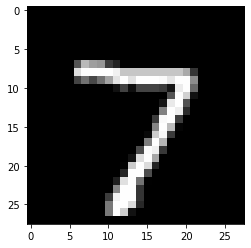

predicted label 2
Actual label 2


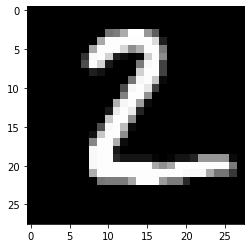

predicted label 1
Actual label 1


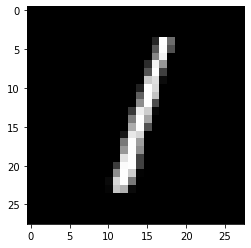

predicted label 0
Actual label 0


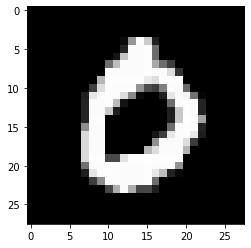

In [15]:
# Show first four images as Pictures
for i in range(0,4):
  image = x_test[i]
  image = np.array(image , dtype='float')
  pixels = image.reshape((28,28))
  plt.imshow(pixels, cmap = 'gray')
  print('predicted label',pred[i])
  print('Actual label',y_test[i])
  plt.show()